In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.fftpack import dct, idct
from scipy.optimize import minimize


def cosamp(phi, u, s, epsilon=1e-10, max_iter=1000):
    """
    Return an `s`-sparse approximation of the target signal
    Input:
        - phi, sampling matrix
        - u, noisy sample vector
        - s, sparsity
    """
    a = np.zeros(phi.shape[1])
    v = u
    it = 0 # count
    halt = False
    while not halt:
        it += 1
        print("Iteration {}\r".format(it), end="")
        
        y = np.dot(np.transpose(phi), v)
        omega = np.argsort(y)[-(2*s):] # large components
        omega = np.union1d(omega, a.nonzero()[0]) # use set instead?
        phiT = phi[:, omega]
        b = np.zeros(phi.shape[1])
        # Solve Least Square
        b[omega], _, _, _ = np.linalg.lstsq(phiT, u)
        
        # Get new estimate
        b[np.argsort(b)[:-s]] = 0
        a = b
        
        # Halt criterion
        v_old = v
        v = u - np.dot(phi, a)

        halt = (np.linalg.norm(v - v_old) < epsilon) or \
            np.linalg.norm(v) < epsilon or \
            it > max_iter
        
    return a

In [2]:
n=1000
k=5

#dEFINE Psi
Psi=dct(np.identity(n))  #discrete cosine transform

s=np.zeros(n)
perm = np.floor(np.random.rand(k) * n).astype(int)
s[perm] = 1

X=Psi @ s
X1=np.linalg.norm(s,ord=1)
X0=np.linalg.norm(s,ord=0)

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


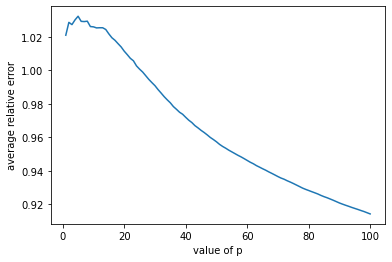

In [6]:
err=[]
r_error=[]

for p in np.arange(1,101):
    for i in range(10):
        C=np.random.randn(p,n)
        y=C @ Psi @ s
        Theta=C @ Psi
        s_hat=cosamp(Theta,y,p)
        e= np.linalg.norm(s-s_hat)/np.linalg.norm(s)
        err.append(e)
  
    error=np.mean(err)
    r_error.append(error)

plt.figure()
plt.plot(np.arange(1,101),r_error)
plt.xlabel('value of p')
plt.ylabel('average relative error')
plt.show()

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


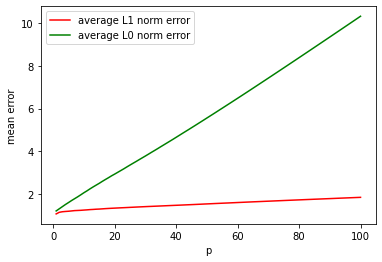

In [7]:
#L1 and L0 norm errors

err1=[]
r_error1=[]
err0=[]
r_error0=[]

for p in np.arange(1,101):
    for i in range(10):
        C1=np.random.randn(p,n)
        y1=C1 @ X
        Theta1=C1 @ Psi
        s_hat1=cosamp(Theta1,y1,p)
        e1= np.linalg.norm(s-s_hat1,ord=1)/X1
        err1.append(e1)
        e0= np.linalg.norm(s-s_hat1,ord=0)/X0
        err0.append(e0)
  
    error1=np.mean(err1)
    r_error1.append(error1)
    error0=np.mean(err0)
    r_error0.append(error0)

plt.figure()
plt.plot(np.arange(1,101),r_error1, color='r', label='average L1 norm error')
plt.plot(np.arange(1,101),r_error0, color='g', label='average L0 norm error')
plt.xlabel('p')
plt.ylabel('mean error')
plt.legend()
plt.show()


<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


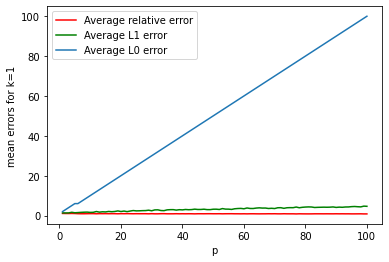

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


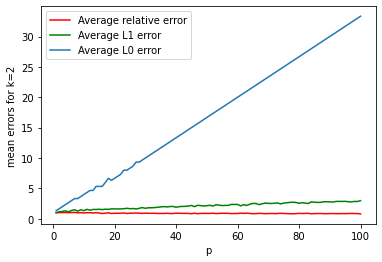

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


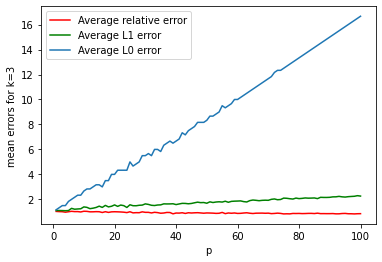

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


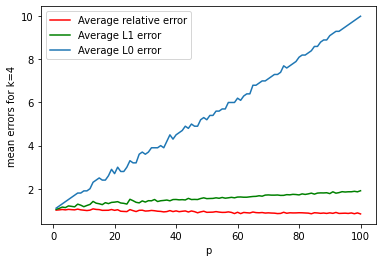

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


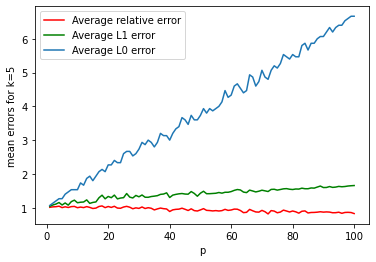

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


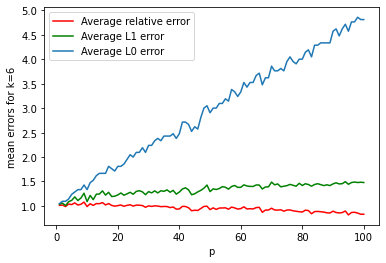

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


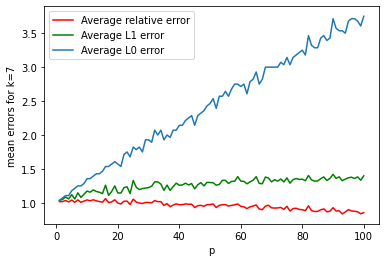

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


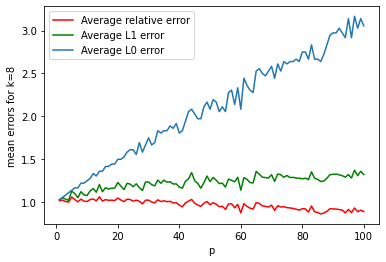

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


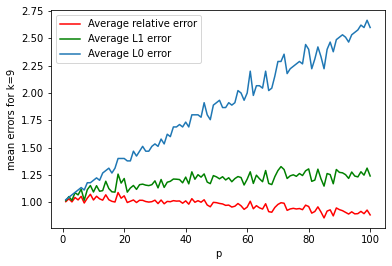

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


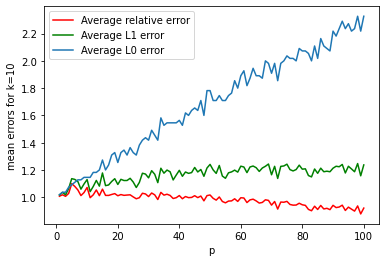

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


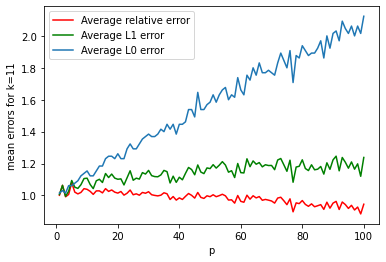

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


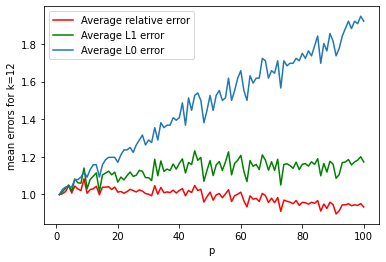

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


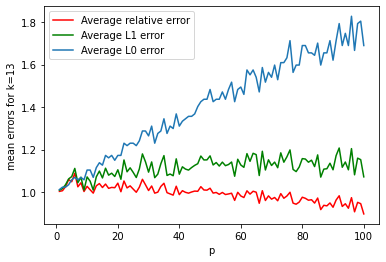

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


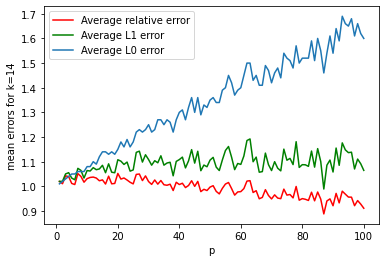

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


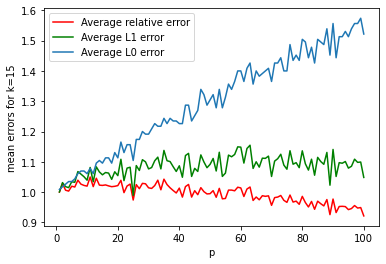

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


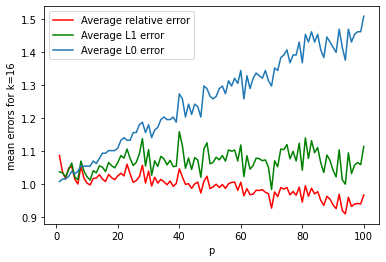

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


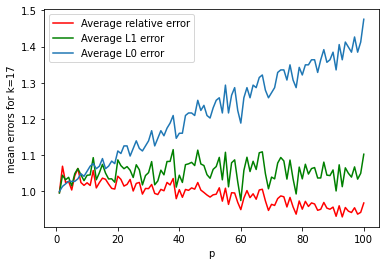

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


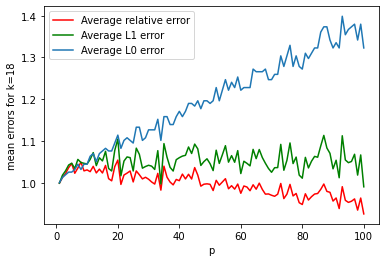

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


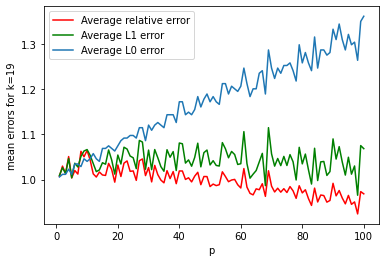

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


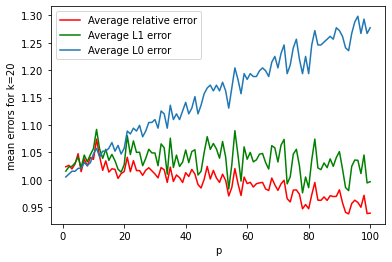

In [9]:
s2=np.zeros(n)

for k in np.arange(1,21):
    perm2 = np.floor(np.random.rand(k) * n).astype(int)
    s2[perm2]=1
    X2=Psi @ s2
    X02=np.linalg.norm(s2,ord=0)
    X12=np.linalg.norm(s2,ord=1)
    X22=np.linalg.norm(s2)
  
    err2=[]
    r_error2=[]
    err12=[]
    r_error12=[]
    err02=[]
    r_error02=[]
  
    for p in np.arange(1,101):
        C02=np.random.randn(p,n)
        y02=C02 @ X2
        Theta02=C02 @ Psi
        s_hat02=cosamp(Theta02,y02,p)
        e2= np.linalg.norm(s2-s_hat02)/X22  #average relative error
        err2.append(e2)
        e12= np.linalg.norm(s2-s_hat02,ord=1)/X12 #average l1 error
        err12.append(e12)
        e02= np.linalg.norm(s2-s_hat02,ord=0)/X02 # average l0 error
        err02.append(e02)
  
    plt.figure()
    plt.plot(np.arange(1,101),err2, color='r',label='Average relative error')
    plt.plot(np.arange(1,101),err12, color='g',label='Average L1 error')
    plt.plot(np.arange(1,101),err02,label='Average L0 error')
    plt.xlabel('p')
    plt.ylabel('mean errors for k='+str(k))
    plt.legend()
    plt.show()

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


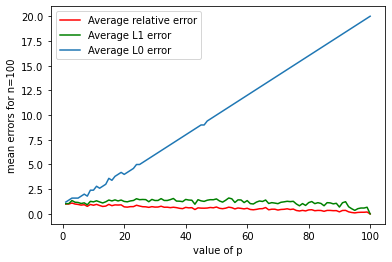

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


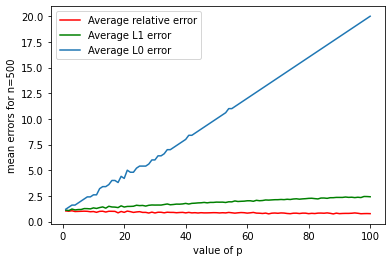

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


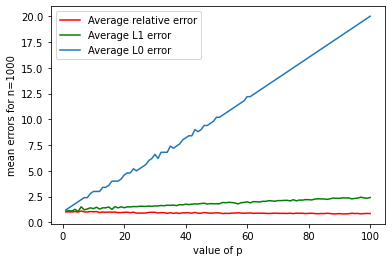

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


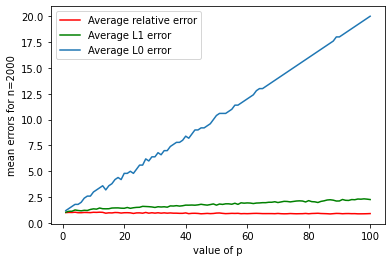

<ipython-input-1-d29c62f2d76f>:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


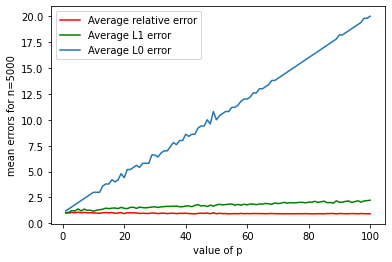

In [10]:
k=5

for n in [100,500,1000,2000,5000]:
  #Build Psi
    Psi3=dct(np.identity(n))
    s3=np.zeros(n)
    perm3 = np.floor(np.random.rand(k) * n).astype(int)
    s3[perm3]=1

    X3=Psi3 @ s3
    X03=np.linalg.norm(s3,ord=0)
    X13=np.linalg.norm(s3,ord=1)
    X33=np.linalg.norm(s3)
  
    err3=[]
    err13=[]
    err03=[]
  
    for p in np.arange(1,101):
        C03=np.random.randn(p,n)
        y03=C03 @ X3
        Theta03=C03 @ Psi3
        s_hat03=cosamp(Theta03,y03,p)
        e3= np.linalg.norm(s3-s_hat03)/X33  #average relative error
        err3.append(e3)
        e13= np.linalg.norm(s3-s_hat03,ord=1)/X13 #average l1 error
        err13.append(e13)
        e03= np.linalg.norm(s3-s_hat03,ord=0)/X03 # average l0 error
        err03.append(e03)
  
    plt.figure()
    plt.plot(np.arange(1,101),err3, color='r',label='Average relative error')
    plt.plot(np.arange(1,101),err13, color='g',label='Average L1 error')
    plt.plot(np.arange(1,101),err03,label='Average L0 error')
    plt.xlabel('value of p')
    plt.ylabel('mean errors for n='+str(n))
    plt.legend()
    plt.show()